# Introduction to Machine Learning using `scikit-learn`

Here is an example of using various regressional techniques (e.g., linear regression, random forest) to predict the maximum temperature from previous weather data.

Note: This is closely following the example provide from this [source](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
 
---

### Goal:
The goal of this notebook is to provide a working example of how to predict a desired quantity using a open-source packaged called [scikit-learn](https://scikit-learn.org/stable/)

### Exact Task: 

Much like what everyone does in the WxChallenge, we are tasked to predict the next days maximum temperature from the previous days temperature and other features. Maybe you can be inspired to translate this into a sucessful effort in the WxChallenge!

### Step 1: 

Let us load in some pre-downloaded data from Seattle, WA. We will use pandas, a helpful package that can go grab the data hosted on github for use and return a DataFrame (which we will name df) 

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dopplerchase/WeatherScripts/master/temps.csv',parse_dates=[['year','month','day']])
df = df.drop(labels='week',axis='columns')
df.rename(columns = {'year_month_day':'dtime_index'}, inplace = True)

Let's take a gander at what is in this file

In [6]:
df.head(5)

,dtime_index,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016-01-01,45,45,45.6,45,43,50,44,29
1,2016-01-02,44,45,45.7,44,41,50,44,61
2,2016-01-03,45,44,45.8,41,43,46,47,56
3,2016-01-04,44,41,45.9,40,44,48,46,53
4,2016-01-05,41,40,46.0,44,46,46,46,41


Here is the description of the variable names:

dtime_index: date <br>
temp_2: max temperature 2 days prior <br>
temp_1: max temperature 1 day prior <br>
average: historical average max temperature <br>
actual: max temperature measurement <br>
forecast_noaa,acc,under : forecasts from some popular agencies <br>
friend: your friend’s prediction, a random number between 20 below the average and 20 above the average <br>

### Step 2:

Lets plot one of the columns just to see what the data looks like. Specifically, the column we are trying to predict.

Populating the interactive namespace from numpy and matplotlib


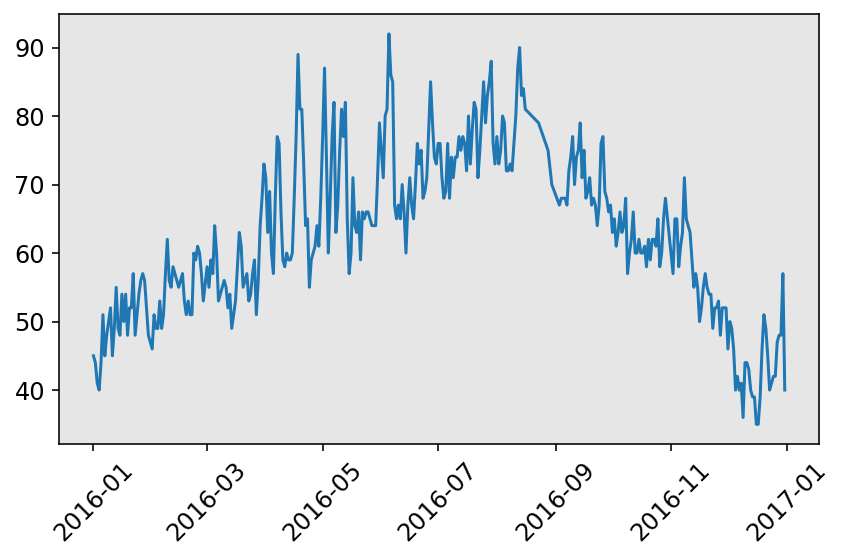

In [20]:
#pylab inline imports numpy as np and matplotlib.pyplot as plt in one easy step. 
%pylab inline

#this line makes the plots nice and high resolution!
%config InlineBackend.figure_format = 'retina'

#plot parameters that I personally like, feel free to make these your own.
matplotlib.rcParams['axes.facecolor'] = [0.9,0.9,0.9]
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['legend.facecolor'] = 'w'
matplotlib.rcParams['figure.facecolor'] ='w'


#HERE IS SOME ACTUAL PLOTING!
plt.plot(df.dtime_index,df.actual)
_ = plt.xticks(rotation=45)
plt.tight_layout()

### Step 3: Your Turn  

I think it would be wise to take a gander at a couple of the columns that you will use as predictors, in data science, these are called Features. 


For example please plot the temp_1 and temp_2 variable

In [ ]:
#put your code here, feel free to copy from above


#

You should see one glaring issue with this data! It should never be 117 $^\circ$F in Seattle, let alone in November. This is a valuable lesson! In order to get good predictions you need to give your model good data. 

I would drop this row from your data. You can do this by the following method 

In [21]:
df = df.where(df.temp_1 < 100).dropna(how='all')
df = df.where(df.temp_2 < 100).dropna(how='all')

### Step 4: 

Now that we cleaned up the bad data point, we need to massage the data into a format the scikit uses. This format is the same for all its models and that is

X: matrix, (n_samples,n_features) [this is what we use to predict] <br>
y: array, (n_samples) [this is what you want to predict] <br>

To keep it simple to start, let us just use the previous day's temp. 

In [22]:
#you might think this is the way to go first
X = df.temp_1
y = df.actual
#but look at the shapes.. 
X.shape,y.shape

((346,), (346,))

the y variable is fine, but you need to add the other dimension to X.

In [23]:
X = df.temp_1[:,np.newaxis]
y = df.actual
#thats better 
X.shape,y.shape

#now we are ready to grab scikit learn

/home/snesbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


((346, 1), (346,))

### Step 5:

For any type of machine learning model you need to have a training dataset and testing dataset. This is how we will tell if our model is overfit!

In [24]:
# to do the splitting, we can use the  train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#see the new sizes
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((259, 1), (87, 1), (259,), (87,))

### Step 6: 

Use climatology to get some baseline statistics


In [25]:
mean_abs_error = np.mean(np.abs(df.actual - df.average))
print('Using Climo gives us a mean error of: {}'.format(mean_abs_error))

Using Climo gives us a mean error of: 4.942196531791906


Looks like for a regression to have any skill it has to do better than 4.94 degrees!

### Step 7: 

Lets do a linear regression first!

Using Linear Reg. gives us a mean error of: 4.100427258776072


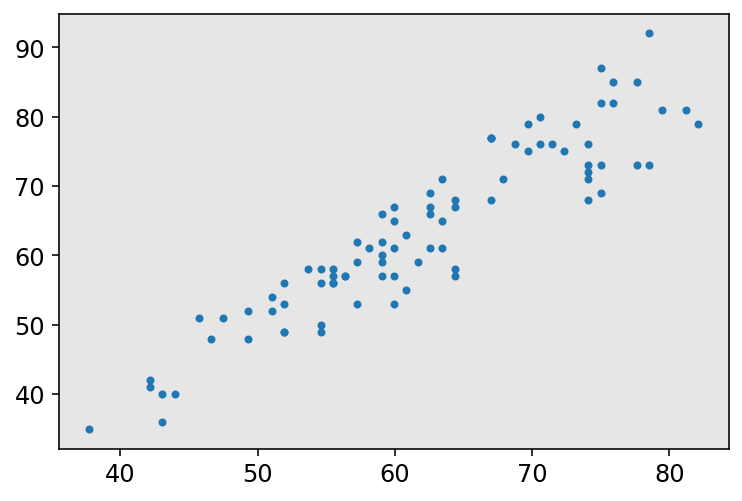

In [26]:
from sklearn.linear_model import LinearRegression

#to train this is all we have to do! reg stands for regression
reg = LinearRegression().fit(X_train, y_train)

#to predict do the following 
yhat = reg.predict(X_test)

#lets plot the results 
plt.plot(yhat,y_test,'.')

mean_abs_error = np.mean(np.abs(y_test - yhat))
print('Using Linear Reg. gives us a mean error of: {}'.format(mean_abs_error))

Slightly better results using the previous days temperature! 

### Step 8: 

Let us try something a bit more sophistocated, like a random forest! if you are interested in learning about the method please consult this [source](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.)

Using RandomForest Reg. gives us a mean error of: 4.193609930452627


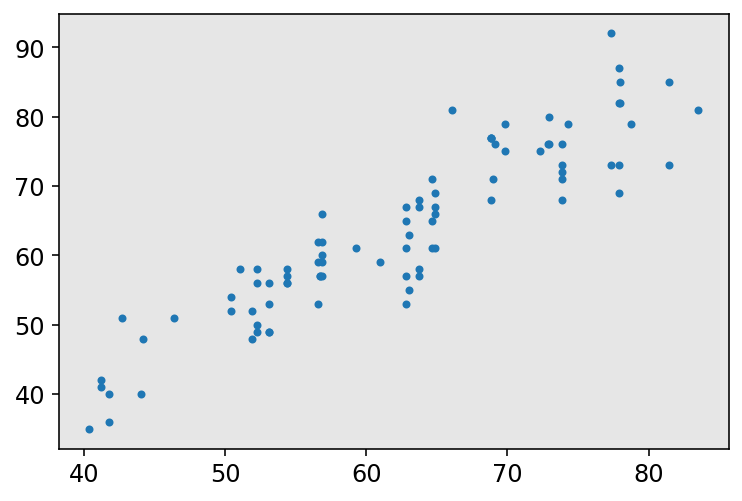

In [27]:
from sklearn.ensemble import RandomForestRegressor


#you will see we use the same exact method as before with the linear regression
reg = RandomForestRegressor().fit(X_train,y_train)

#to predict do the following 
yhat = reg.predict(X_test)

#lets plot the results 
plt.plot(yhat,y_test,'.')

mean_abs_error = np.mean(np.abs(y_test - yhat))
print('Using RandomForest Reg. gives us a mean error of: {}'.format(mean_abs_error))

For this simple 1 feature prediction, the Linear Regression actually does better!

### Step 9: 

Now include temp_2 and the climo in your prediction.

In [28]:
#so now we need a new X matrix
X = np.hstack([df.temp_1[:,np.newaxis],df.temp_2[:,np.newaxis],df.average[:,np.newaxis]])
y = df.actual
#check shapes
X.shape,y.shape
#

#since we have new feautres, we have to split the data again. 
#the random state of 42 will ensure we use the same random splits as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#see the new sizes
X_train.shape,X_test.shape,y_train.shape,y_test.shape

/home/snesbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


((259, 3), (87, 3), (259,), (87,))

Using Linear Reg. gives us a mean error of: 3.901594072379357


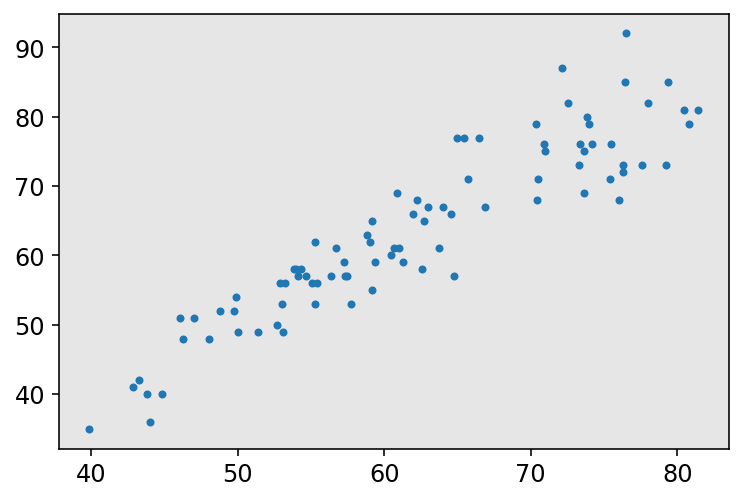

In [29]:
#to train this is all we have to do! reg stands for regression
reg = LinearRegression().fit(X_train, y_train)

#to predict do the following 
yhat = reg.predict(X_test)

#lets plot the results 
plt.plot(yhat,y_test,'.')

mean_abs_error = np.mean(np.abs(y_test - yhat))
print('Using Linear Reg. gives us a mean error of: {}'.format(mean_abs_error))

Using RandomForest Reg. gives us a mean error of: 4.211931034482758


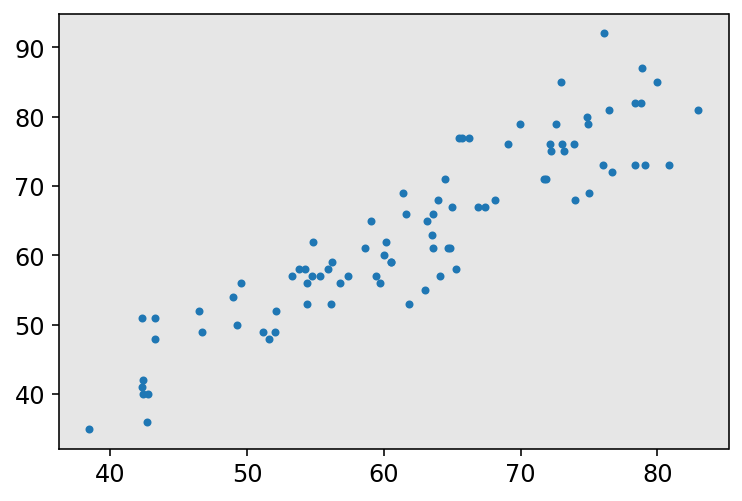

In [30]:
#you will see we use the same exact method as before with the linear regression
reg = RandomForestRegressor(n_estimators = 1000,).fit(X_train,y_train)

#to predict do the following 
yhat = reg.predict(X_test)

#lets plot the results 
plt.plot(yhat,y_test,'.')

mean_abs_error = np.mean(np.abs(y_test - yhat))
print('Using RandomForest Reg. gives us a mean error of: {}'.format(mean_abs_error))

Hmm you can see the RandomForest is still losing. What if we give it the kitchen sink (aka all the data)

In [33]:
df_X =  df.drop(labels=['actual','friend','dtime_index'],axis='columns')

#We can also add features, like the day of year, and a proxy for sun angle
df_X['doy'] = df['dtime_index'].dt.dayofyear
df_X['sun_angle'] = -1.*np.cos(2*np.pi*(21+df_X['doy'])/365.)


#so now we need a new X matrix
X = df_X.values
y = df.actual
#check shapes
X.shape,y.shape
#


#since we have new feautres, we have to split the data again. 
#the random state of 42 will ensure we use the same random splits as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


#see the new sizes
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((259, 8), (87, 8), (259,), (87,))

Using Linear Reg. gives us a mean error of: 3.7684932288090236


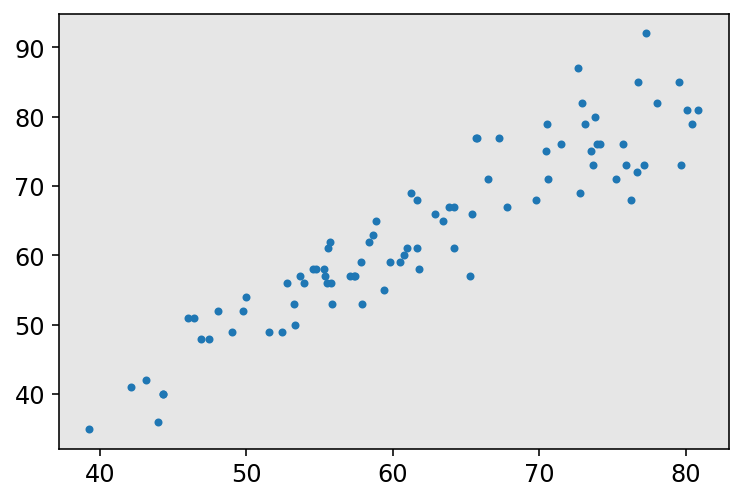

In [34]:
#to train this is all we have to do! reg stands for regression
reg = LinearRegression().fit(X_train, y_train)

#to predict do the following 
yhat = reg.predict(X_test)

#lets plot the results 
plt.plot(yhat,y_test,'.')

mean_abs_error = np.mean(np.abs(y_test - yhat))
print('Using Linear Reg. gives us a mean error of: {}'.format(mean_abs_error))

Using RandomForest Reg. gives us a mean error of: 4.213954022988506


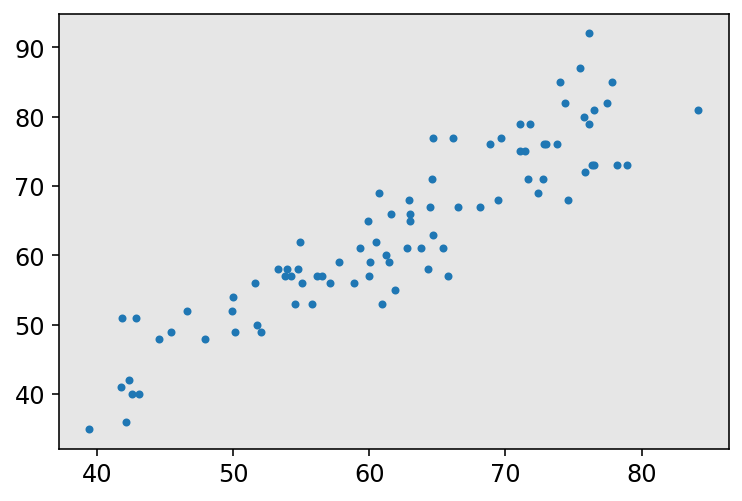

In [35]:
#you will see we use the same exact method as before with the linear regression
reg = RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train,y_train)

#to predict do the following 
yhat = reg.predict(X_test)

#lets plot the results 
plt.plot(yhat,y_test,'.')

mean_abs_error = np.mean(np.abs(y_test - yhat))
print('Using RandomForest Reg. gives us a mean error of: {}'.format(mean_abs_error))

There are also utilities to do a parameter sweep to do see the effect of hyperparameters on your model.  We won't do this here because it takes a lot of time, but here is code in case you are interested.

In [19]:
n_estimators = [500, 800, 1500, 1000, 2000]

max_features = ['auto','sqrt','log2']

max_depth = [10, 25, 50]
max_depth.append(None)

min_samples_split = [2, 10, 20]

min_samples_leaf = [1, 4, 15]

grid_param = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

from sklearn.model_selection import RandomizedSearchCV
reg = RandomForestRegressor(random_state = 42)
reg_random = RandomizedSearchCV(estimator = reg,
                                param_distributions = grid_param, n_iter = 500,
                                cv = 5, verbose = 2, random_state = 42,
                                n_jobs = -1)

SyntaxError: invalid syntax (<ipython-input-19-c175c9821d33>, line 1)

Now, do the parameter sweep on all available CPUs.

In [ ]:
reg_random.fit(X_train,y_train)
print(reg_random.best_params_)

Here is output, you can see it took some time.  It returns the optimal parameters that it found.

```
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 324 is smaller than n_iter=500. Running 324 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 36.4min finished
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
```

### Did we do good?

So how did we do compared with the "experts"?  Let's compare the models with the forecasts we have.

In [36]:
print('NOAA MAE: ',np.mean(np.abs(df['forecast_noaa']-df['actual'])))
print('Under MAE: ',np.mean(np.abs(df['forecast_under']-df['actual'])))
print('AccU MAE: ',np.mean(np.abs(df['forecast_acc']-df['actual'])))

NOAA MAE:  6.30635838150289
Under MAE:  5.054913294797688
AccU MAE:  4.794797687861272
